<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Summer24/softmax_demo_summer24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
scaler = StandardScaler() #z-score normalization
iris.data = scaler.fit_transform(iris.data)

encoder = OneHotEncoder(sparse_output=False)
target_reshaped = iris.target.reshape(-1, 1)
target_one_hot = encoder.fit_transform(target_reshaped)

N = iris.data.shape[0] #number of rows
D = iris.data.shape[1] #number of columns

In [20]:
import pandas as pd

pd.DataFrame(iris.data).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [36]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential([tf.keras.layers.Dense(3, input_shape=(D,))])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  return model

In [27]:
def plot_the_loss_curve(epochs, loss):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

  plt.plot(epochs, loss, label="Loss")
  plt.legend()
  plt.ylim([loss.min()*0.97, loss.max()*1.03])
  plt.show()

Epoch 1/100
120/120 [==============================] - 1s 4ms/step - loss: 0.6275 - accuracy: 0.7167 - val_loss: 0.7979 - val_accuracy: 0.3667
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.9083 - val_loss: 0.5834 - val_accuracy: 0.6667
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.9250 - val_loss: 0.4715 - val_accuracy: 0.7000
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.9333 - val_loss: 0.4781 - val_accuracy: 0.7000
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.2301 - accuracy: 0.9583 - val_loss: 0.4674 - val_accuracy: 0.7000
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9667 - val_loss: 0.4793 - val_accuracy: 0.7000
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9583 - val_loss: 0.4098 - val_accuracy: 0.7667

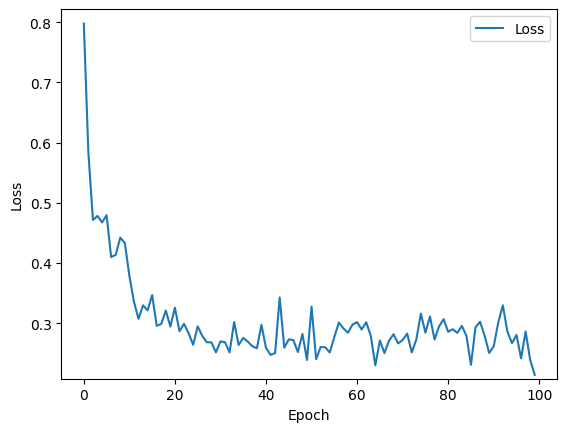

In [37]:
learning_rate = 0.01

model = build_model(learning_rate)
history = model.fit(x=iris.data,
                    y=target_one_hot,
                    batch_size=1,
                    epochs=100, verbose=1, validation_split=0.2)
epochs = history.epoch
hist = pd.DataFrame(history.history)

plot_the_loss_curve(epochs, hist["val_loss"])


In [38]:
hist

,loss,accuracy,val_loss,val_accuracy
0,0.627519,0.716667,0.797870,0.366667
1,0.371144,0.908333,0.583439,0.666667
2,0.303009,0.925000,0.471479,0.700000
3,0.260130,0.933333,0.478066,0.700000
4,0.230127,0.958333,0.467441,0.700000
...,...,...,...,...
95,0.025406,1.000000,0.280300,0.833333
96,0.026266,0.991667,0.241414,0.866667
97,0.025657,1.000000,0.285975,0.833333
98,0.025878,1.000000,0.238885,0.866667


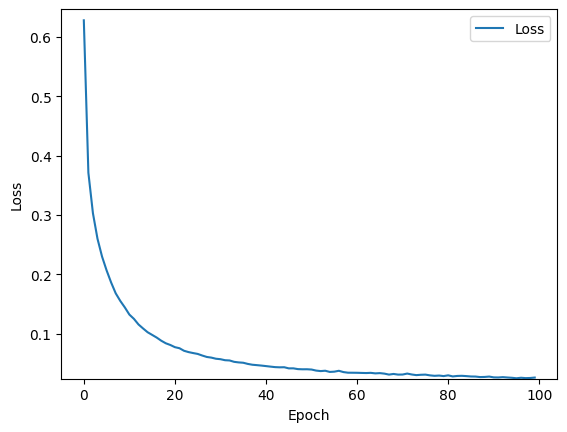

In [39]:
plot_the_loss_curve(epochs, hist["loss"])


In [40]:
model.weights

[<tf.Variable 'dense_8/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-2.895,  0.82 , -0.565],
        [ 3.341, -0.147, -2.204],
        [-8.338, -2.044,  4.48 ],
        [-8.012, -3.591,  5.451]], dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(3,) dtype=float32, numpy=array([-2.635,  5.545, -5.349], dtype=float32)>]

In [41]:
model.evaluate(iris.data, target_one_hot)


5/5 [==============================] - 0s 4ms/step - loss: 0.0630 - accuracy: 0.9800


[0.06303489953279495, 0.9800000190734863]

In [77]:
model.predict(iris.data[[129]])

1/1 [==============================] - 0s 44ms/step


array([[-21.738,   2.647,   2.087]], dtype=float32)

In [81]:
target_one_hot[129]

array([0., 0., 1.])

In [80]:
logits = tf.constant([-21.738,   2.647,   2.087])
probabilities = tf.nn.softmax(logits)
print(probabilities)

tf.Tensor([0.    0.636 0.364], shape=(3,), dtype=float32)


In [85]:
np.exp(2.647 - (-21.738)) / np.exp(2.087 - (-21.738))

1.7506725002960988

In [86]:
0.636 / 0.364

1.7472527472527473